In [1]:
import pandas as pd

# 데이터 가져오기
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
### 데이터 전처리
df = df.drop(["CustomerID","Genre"], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
X = df
# 데이터 스케일링해보기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### DBSCAN 클러스터링

In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# dbscan 클러스터링 적용하기
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

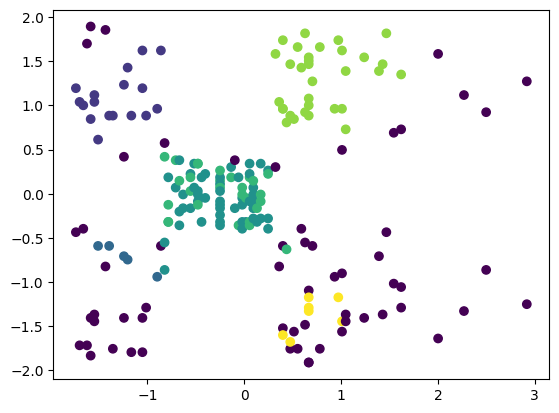

In [8]:
# 결과 시각화
labels = dbscan.labels_
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap="viridis")
plt.show()

In [9]:
df['DBSCAN_Cluster'] = labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),DBSCAN_Cluster
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1


In [10]:
df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: count, dtype: int64

In [11]:
df.groupby('DBSCAN_Cluster')[["Annual Income (k$)","Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,
-1,68.533333,31.533333
0,25.823529,78.176471
1,27.800000,31.800000
2,54.156863,48.411765
3,54.321429,50.464286
4,80.875000,83.625000
5,78.714286,14.571429


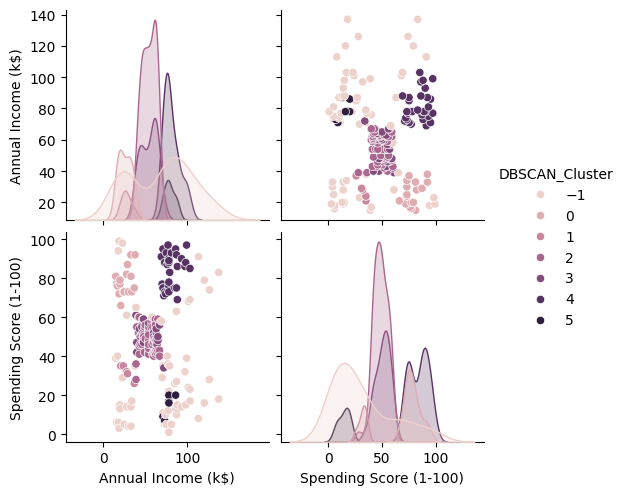

In [12]:
import seaborn as sns
sns.pairplot(df, hue="DBSCAN_Cluster", vars=["Annual Income (k$)","Spending Score (1-100)"])
plt.show()